# Spark SQL

##  Basic SQL Operations in Spark SQL


In [5]:
pip install findspark

### Tugas
Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.

In [6]:
import findspark
findspark.init()

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("tugas_9").getOrCreate()

In [8]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Kate', 28, 'F', 5000, 3),
    ('John', 31, 'M', 3500, 2),
    ('Emma', 32, 'F', 3200, 3),
    ('Mike', 27, 'M', 2800, 1),
    ('Sara', 23, 'F', 4500, 2),
    ('Tom', 30, 'M', 3000, 3),
    ('Julia', 28, 'F', 3900, 1),
    ('Carlos', 32, 'M', 4600, 2),
    ('Diana', 32, 'F', 4200, 3),
    ('Steve', 35, 'M', 5500, 1),
    ('Sophia', 23, 'F', 3100, 2),
    ('Chris', 28, 'M', 4100, 3)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| James| 34|     M|  3000|     1|
|  Anna| 28|     F|  4100|     2|
|   Lee| 23|     M|  2700|     1|
|  Kate| 28|     F|  5000|     3|
|  John| 31|     M|  3500|     2|
|  Emma| 32|     F|  3200|     3|
|  Mike| 27|     M|  2800|     1|
|  Sara| 23|     F|  4500|     2|
|   Tom| 30|     M|  3000|     3|
| Julia| 28|     F|  3900|     1|
|Carlos| 32|     M|  4600|     2|
| Diana| 32|     F|  4200|     3|
| Steve| 35|     M|  5500|     1|
|Sophia| 23|     F|  3100|     2|
| Chris| 28|     M|  4100|     3|
+------+---+------+------+------+

+------+---+
|  Name|Age|
+------+---+
|  Anna| 28|
|  Kate| 28|
|  John| 31|
|  Emma| 32|
|  Sara| 23|
| Julia| 28|
|Carlos| 32|
| Diana| 32|
| Steve| 35|
|Sophia| 23|
| Chris| 28|
+------+---+

+------------------+
|       avg(Salary)|
+------------------+
|3813.3333333333335|
+------------------+



## Advanced Queries for Data Analysis



### Tugas


In [9]:
# Total gaji berdasarkan jenis kelamin dan usia.

spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       7600| 23|
|     M|       2800| 27|
|     F|      13000| 28|
|     M|       4100| 28|
|     M|       3000| 30|
|     M|       3500| 31|
|     F|       7400| 32|
|     M|       4600| 32|
|     M|       3000| 34|
|     M|       5500| 35|
+------+-----------+---+



In [10]:
# Rata-rata gaji per departemen.

spark.sql('''
SELECT DeptId, AVG(Salary) as avgSalary
FROM employees
GROUP BY DeptId
''').show()

+------+---------+
|DeptId|avgSalary|
+------+---------+
|     1|   3580.0|
|     3|   3900.0|
|     2|   3960.0|
+------+---------+



In [11]:
# Karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.

print('Rata-rata gaji per gender')
avg_salaries_gender = spark.sql('''
SELECT Gender, AVG(Salary) AS avg_salary
FROM employees
GROUP BY Gender
''')

avg_salaries_gender.createOrReplaceTempView('avg_salaries_gender')
avg_salaries_gender.show()

print('Karyawan yang memiliki gaji di atas rata-rata untuk masing-masing gender')
spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN avg_salaries_gender a ON e.Gender = a.Gender
WHERE e.Salary > a.avg_salary
''').show()


Rata-rata gaji per gender
+------+----------+
|Gender|avg_salary|
+------+----------+
|     F|    4000.0|
|     M|    3650.0|
+------+----------+

Karyawan yang memiliki gaji di atas rata-rata untuk masing-masing gender
+------+------+------+
|  Name|Gender|Salary|
+------+------+------+
|  Anna|     F|  4100|
|  Kate|     F|  5000|
|  Sara|     F|  4500|
| Diana|     F|  4200|
|Carlos|     M|  4600|
| Steve|     M|  5500|
| Chris|     M|  4100|
+------+------+------+



In [12]:
# Ranking karyawan berdasarkan gaji dalam departemen mereka.

spark.sql('''
SELECT Name, Salary, DeptId, RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
ORDER BY DeptId, Rank
''').show()

+------+------+------+----+
|  Name|Salary|DeptId|Rank|
+------+------+------+----+
| Steve|  5500|     1|   1|
| Julia|  3900|     1|   2|
| James|  3000|     1|   3|
|  Mike|  2800|     1|   4|
|   Lee|  2700|     1|   5|
|Carlos|  4600|     2|   1|
|  Sara|  4500|     2|   2|
|  Anna|  4100|     2|   3|
|  John|  3500|     2|   4|
|Sophia|  3100|     2|   5|
|  Kate|  5000|     3|   1|
| Diana|  4200|     3|   2|
| Chris|  4100|     3|   3|
|  Emma|  3200|     3|   4|
|   Tom|  3000|     3|   5|
+------+------+------+----+



## Penggunaan Window Functions dan Subqueries


### Tugas


In [13]:
# Window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.

spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+------+---+------+----+
|  Name|Age|Salary|rank|
+------+---+------+----+
|  Sara| 23|  4500|   1|
|Sophia| 23|  3100|   2|
|   Lee| 23|  2700|   3|
|  Mike| 27|  2800|   1|
|  Kate| 28|  5000|   1|
|  Anna| 28|  4100|   2|
| Chris| 28|  4100|   3|
| Julia| 28|  3900|   4|
|   Tom| 30|  3000|   1|
|  John| 31|  3500|   1|
|Carlos| 32|  4600|   1|
| Diana| 32|  4200|   2|
|  Emma| 32|  3200|   3|
| James| 34|  3000|   1|
| Steve| 35|  5500|   1|
+------+---+------+----+



In [14]:
# Window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu

spark.sql('''
WITH ranked_employees AS (
    SELECT Name, Age, Salary,
           ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
    FROM employees
)
SELECT Name, Age, Salary, rank
FROM ranked_employees
WHERE rank <= 3
ORDER BY Age, rank
''').show()

+------+---+------+----+
|  Name|Age|Salary|rank|
+------+---+------+----+
|  Sara| 23|  4500|   1|
|Sophia| 23|  3100|   2|
|   Lee| 23|  2700|   3|
|  Mike| 27|  2800|   1|
|  Kate| 28|  5000|   1|
|  Anna| 28|  4100|   2|
| Chris| 28|  4100|   3|
|   Tom| 30|  3000|   1|
|  John| 31|  3500|   1|
|Carlos| 32|  4600|   1|
| Diana| 32|  4200|   2|
|  Emma| 32|  3200|   3|
| James| 34|  3000|   1|
| Steve| 35|  5500|   1|
+------+---+------+----+



## Advanced Spark SQL Queries


### Tugas

In [15]:
# Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Kate', 28, 'F', 5000, 3),
    ('John', 31, 'M', 3500, 2),
    ('Emma', 32, 'F', 3200, 3),
    ('Mike', 27, 'M', 2800, 1),
    ('Sara', 23, 'F', 4500, 2),
    ('Tom', 30, 'M', 3000, 3),
    ('Julia', 28, 'F', 3900, 1),
    ('Carlos', 32, 'M', 4600, 2),
    ('Diana', 32, 'F', 4200, 3),
    ('Steve', 35, 'M', 5500, 1),
    ('Sophia', 23, 'F', 3100, 2),
    ('Chris', 28, 'M', 4100, 3)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'Engineering')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B'),
    (3, 'Project C')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+------+---+-----------+-----------+
|  Name|Age|   DeptName|ProjectName|
+------+---+-----------+-----------+
| Steve| 35|         HR|  Project A|
| Julia| 28|         HR|  Project A|
|  Mike| 27|         HR|  Project A|
|   Lee| 23|         HR|  Project A|
| James| 34|         HR|  Project A|
| Chris| 28|Engineering|  Project C|
| Diana| 32|Engineering|  Project C|
|   Tom| 30|Engineering|  Project C|
|  Emma| 32|Engineering|  Project C|
|  Kate| 28|Engineering|  Project C|
|Sophia| 23|  Marketing|  Project B|
|Carlos| 32|  Marketing|  Project B|
|  Sara| 23|  Marketing|  Project B|
|  John| 31|  Marketing|  Project B|
|  Anna| 28|  Marketing|  Project B|
+------+---+-----------+-----------+



In [16]:
# Rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.

spark.sql('''
SELECT e.Name, d.DeptName, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY e.DeptId) as AvgDeptSalary,
       ROW_NUMBER() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) as Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+------+-----------+------+-------------+----+
|  Name|   DeptName|Salary|AvgDeptSalary|Rank|
+------+-----------+------+-------------+----+
| Steve|         HR|  5500|       3580.0|   1|
| Julia|         HR|  3900|       3580.0|   2|
| James|         HR|  3000|       3580.0|   3|
|  Mike|         HR|  2800|       3580.0|   4|
|   Lee|         HR|  2700|       3580.0|   5|
|Carlos|  Marketing|  4600|       3960.0|   1|
|  Sara|  Marketing|  4500|       3960.0|   2|
|  Anna|  Marketing|  4100|       3960.0|   3|
|  John|  Marketing|  3500|       3960.0|   4|
|Sophia|  Marketing|  3100|       3960.0|   5|
|  Kate|Engineering|  5000|       3900.0|   1|
| Diana|Engineering|  4200|       3900.0|   2|
| Chris|Engineering|  4100|       3900.0|   3|
|  Emma|Engineering|  3200|       3900.0|   4|
|   Tom|Engineering|  3000|       3900.0|   5|
+------+-----------+------+-------------+----+



In [17]:
# Window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

spark.sql('''
SELECT e.Age, d.DeptName, AVG(e.Salary) as AvgSalary,
       ROW_NUMBER() OVER (PARTITION BY e.Age, e.DeptId ORDER BY AVG(e.Salary) DESC) as Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY e.Age, d.DeptName, e.DeptId
''').show()

+---+-----------+---------+----+
|Age|   DeptName|AvgSalary|Rank|
+---+-----------+---------+----+
| 23|         HR|   2700.0|   1|
| 23|  Marketing|   3800.0|   1|
| 27|         HR|   2800.0|   1|
| 28|         HR|   3900.0|   1|
| 28|  Marketing|   4100.0|   1|
| 28|Engineering|   4550.0|   1|
| 30|Engineering|   3000.0|   1|
| 31|  Marketing|   3500.0|   1|
| 32|  Marketing|   4600.0|   1|
| 32|Engineering|   3700.0|   1|
| 34|         HR|   3000.0|   1|
| 35|         HR|   5500.0|   1|
+---+-----------+---------+----+



## Advanced Data Analysis and Visualization

---



### Tugas

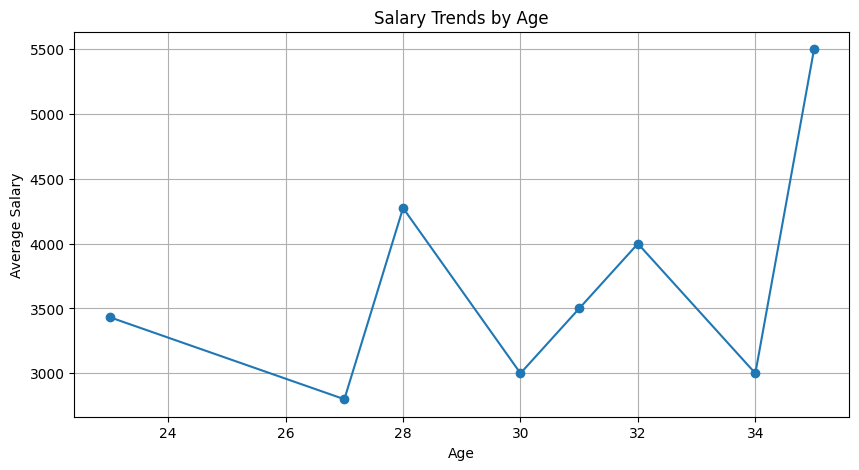

In [18]:
# Analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.

import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


## Homework


+-----------+-----------+-------------+
|   DeptName|TotalSalary|EmployeeCount|
+-----------+-----------+-------------+
|Engineering|      19500|            5|
|         HR|      17900|            5|
|  Marketing|      19800|            5|
+-----------+-----------+-------------+



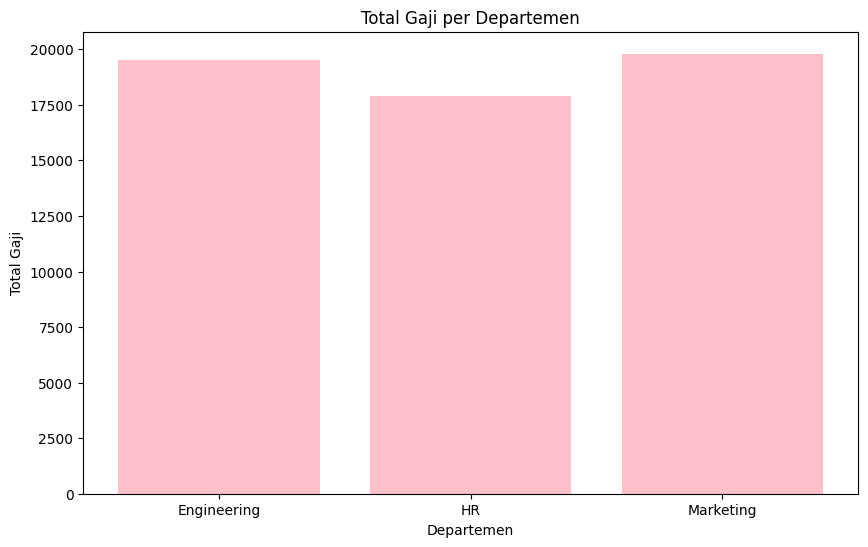

In [19]:
# Tugas 1: Total gaji dan jumlah karyawan per departemen dan visualisasi perbandingan antar departemen.


import matplotlib.pyplot as plt
import pandas as pd

# Total gaji dan jumlah karyawan per departemen
total_salary_and_count = spark.sql('''
SELECT d.DeptName,
       SUM(e.Salary) as TotalSalary,
       COUNT(e.Name) as EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

total_salary_and_count.show()

# Mengonversi hasil ke DataFrame pandas untuk visualisasi
df = total_salary_and_count.toPandas()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(df['DeptName'], df['TotalSalary'], color='pink')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Total Gaji per Departemen')
plt.xticks(rotation=0)
plt.show()

+------+---+------+
|  Name|Age|Salary|
+------+---+------+
|  Kate| 28|  5000|
|Carlos| 32|  4600|
| Diana| 32|  4200|
|  Sara| 23|  4500|
+------+---+------+



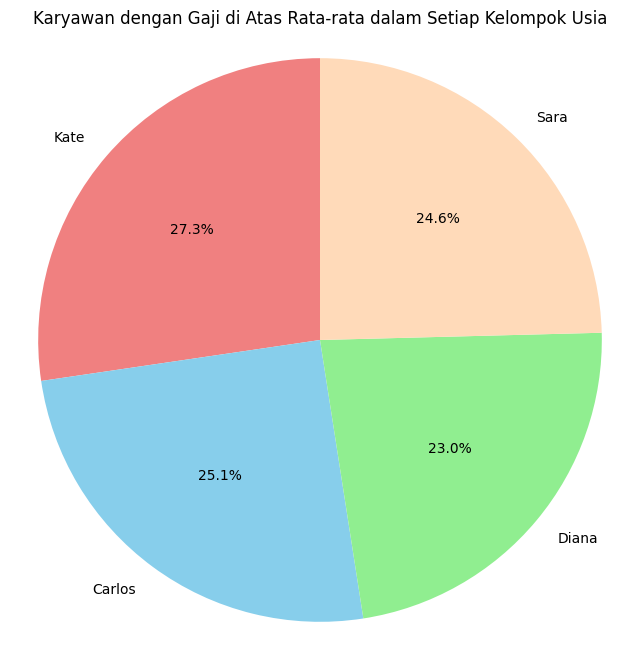

In [25]:
# Tugas 2: Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia
#          dan Visualisasikan data ini dalam bentuk grafik batang atau pie chart.


import pandas as pd
import matplotlib.pyplot as plt

above_average_salary = spark.sql('''
WITH AvgSalaryByAge AS (
    SELECT Age, AVG(Salary) as AvgSalary
    FROM employees
    GROUP BY Age
)
SELECT e.Name, e.Age, e.Salary
FROM employees e
JOIN AvgSalaryByAge a ON e.Age = a.Age
WHERE e.Salary > a.AvgSalary
''')
above_average_salary.show()

above_average_salary_pd = above_average_salary.toPandas()

custom_colors = ['lightcoral', 'skyblue', 'lightgreen', 'peachpuff']
plt.figure(figsize=(8, 8))
plt.pie(above_average_salary_pd['Salary'],
        labels=above_average_salary_pd['Name'],
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_colors[:len(above_average_salary_pd)])

plt.title('Karyawan dengan Gaji di Atas Rata-rata dalam Setiap Kelompok Usia')
plt.axis('equal')

plt.show()

In [34]:
# Tugas 3: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL
#          functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.


import random
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Create Large Employee Dataset").getOrCreate()


num_employees = 150
names = [f'Pegawai {i}' for i in range(1, num_employees + 1)]
ages = [random.randint(20, 60) for _ in range(num_employees)]
genders = [random.choice(['M', 'F']) for _ in range(num_employees)]
salaries = [random.randint(2500, 10000) for _ in range(num_employees)]
dept_ids = [random.randint(1, 5) for _ in range(num_employees)]

employee_data = zip(names, ages, genders, salaries, dept_ids)
employees_df = spark.createDataFrame(employee_data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

employees_df.show(10)

employees_df.createOrReplaceTempView('employees')

+----------+---+------+------+------+
|      Name|Age|Gender|Salary|DeptId|
+----------+---+------+------+------+
| Pegawai 1| 36|     M|  7723|     2|
| Pegawai 2| 49|     M|  6492|     4|
| Pegawai 3| 35|     M|  6900|     1|
| Pegawai 4| 31|     M|  7715|     4|
| Pegawai 5| 34|     F|  5760|     4|
| Pegawai 6| 44|     M|  9265|     4|
| Pegawai 7| 42|     F|  4740|     1|
| Pegawai 8| 47|     M|  7113|     5|
| Pegawai 9| 31|     F|  6935|     3|
|Pegawai 10| 42|     F|  5223|     2|
+----------+---+------+------+------+
only showing top 10 rows



In [35]:
departments_data = [
    (1, 'HR'),
    (2, 'IT'),
    (3, 'Finance'),
    (4, 'Marketing'),
    (5, 'Sales')
]

departments_df = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])
departments_df.createOrReplaceTempView('departments')

analysis = spark.sql('''
SELECT d.DeptName,
       COUNT(e.Name) AS EmployeeCount,
       SUM(e.Salary) AS TotalSalary,
       AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY d.DeptName
''')

analysis.show()

+---------+-------------+-----------+-----------------+
| DeptName|EmployeeCount|TotalSalary|        AvgSalary|
+---------+-------------+-----------+-----------------+
|  Finance|           31|     203850|6575.806451612903|
|       HR|           32|     187308|         5853.375|
|       IT|           29|     183530|6328.620689655172|
|Marketing|           33|     199952|6059.151515151515|
|    Sales|           25|     168133|          6725.32|
+---------+-------------+-----------+-----------------+



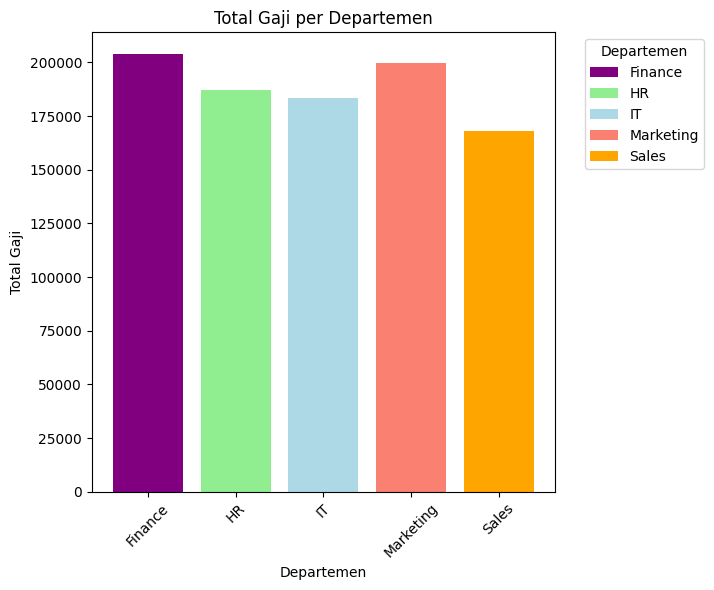

In [40]:
# Grafik Total Gaji per Departemen

import matplotlib.pyplot as plt
import pandas as pd

df_deep_analysis = analysis.toPandas()

plt.figure(figsize=(12, 6))

custom_colors = ['purple', 'lightgreen', 'lightblue', 'salmon', 'orange']

if len(custom_colors) < len(df_deep_analysis):
    raise ValueError("Not enough colors provided for the number of departments.")

plt.subplot(1, 2, 1)
bars = plt.bar(df_deep_analysis['DeptName'], df_deep_analysis['TotalSalary'], color=custom_colors[:len(df_deep_analysis)])
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Total Gaji per Departemen')
plt.xticks(rotation=45)

plt.legend(bars, df_deep_analysis['DeptName'], title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


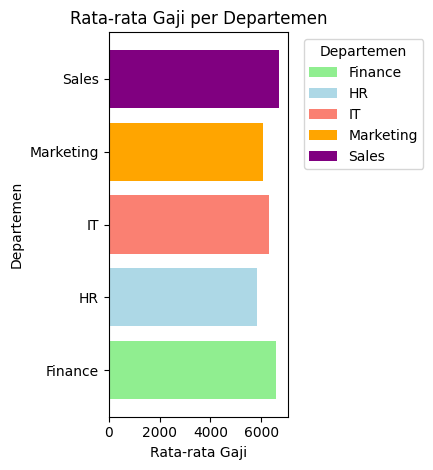

In [39]:
# Grafik Rata-Rata Gaji per Departemen

import matplotlib.pyplot as plt

custom_colors = ['lightgreen', 'lightblue', 'salmon', 'orange', 'purple']

if len(custom_colors) < len(df_deep_analysis):
    raise ValueError("Not enough colors provided for the number of departments.")

plt.subplot(1, 2, 2)
bars = plt.barh(df_deep_analysis['DeptName'], df_deep_analysis['AvgSalary'], color=custom_colors[:len(df_deep_analysis)])

plt.ylabel('Departemen')
plt.xlabel('Rata-rata Gaji')
plt.title('Rata-rata Gaji per Departemen')

plt.legend(bars, df_deep_analysis['DeptName'], title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
